# <center> Module 7 Homework
#### <center> ISE-529, Fall 2021
#### <center> Haotian Liang
#### <center> Due:  November 22, 2021

##  1)  Polynomial Regression (30 points)

1a)  For this problem, we are going to use the wage_data.csv dataset to create a fourth-degree polynomial linear model of wage based on age.  We are doing all of these problems with the full dataset.  Read the file into a dataframe called wage_data and display the dataframe.

In [398]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import seaborn
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [399]:
wage_data=pd.read_csv('wage_data.csv')
wage_data

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,1. Male,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Male,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [400]:
new_data=pd.DataFrame(wage_data['age'])
new_data['wage']=wage_data['wage']
new_data

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154
...,...,...
2995,44,154.685293
2996,30,99.689464
2997,27,66.229408
2998,27,87.981033


In [401]:
X4 = PolynomialFeatures(4).fit_transform(new_data.age.values.reshape(-1,1))

In [402]:
fit2 = sm.GLS(new_data.wage, X4).fit()
fit2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [403]:
X = new_data.iloc[:, 0:1].values
y = new_data.iloc[:, 1].values

In [404]:
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
lin = LinearRegression()
modle = lin.fit(X_poly, y)
modle.predict(X_poly)

array([ 51.9314503 ,  84.47675565, 119.32598488, ...,  95.44973383,
        95.44973383, 118.63269421])

1b)  Using Seaborn, create a scatterplot of wage as a function of age

<AxesSubplot:xlabel='age', ylabel='wage'>

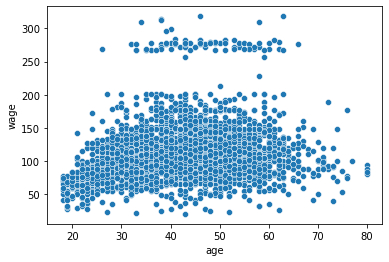

In [405]:
sns.scatterplot(x = "age", y = "wage", data = wage_data)

1c)  Using sklearn, define and fit a fourth-order polynomial regression model.  Hint:  use the PolynomialFeatures function from the sklearn.preprocessing package to create all of the polynomial values of age.  Create an array of ages (from the min to the max age in the dataset) and use it as an input to the model you created above to determine the predictions which come from your model.  Plot this polynomial predictions line overlaid onto the Seaborn scatterplot created above

<AxesSubplot:xlabel='age', ylabel='wage'>

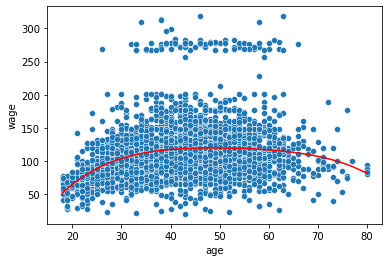

In [406]:
sns.scatterplot(x = "age", y = "wage", data = wage_data)
sns.lineplot(x = wage_data['age'], y = modle.predict(X_poly), color = 'red')

## 2)  Step Function (30 points)

2a)  Now, fit a step function to the data of wage as a function of age with the following four ranges:
  - 18 - 33.5
  - 33.5 - 49
  - 49 - 64.5
  - 64.5 - 80

Similar to above, plot this step function predictions line overlaid onto the Seaborn scatterplot created above.

Follow the steps laid out below:

  - Create a dataframe called step_function_data that contains the age, wage, and four boolean "bin variables" (b_0, b_1, b_2, b_3) that have a 1 for the bin that observation falls into (and 0 otherwise)

In [407]:
step_function_data=new_data
step_function_data

,age,wage
0,18,75.043154
1,24,70.476020
2,45,130.982177
3,43,154.685293
4,50,75.043154
...,...,...
2995,44,154.685293
2996,30,99.689464
2997,27,66.229408
2998,27,87.981033


In [408]:
b_0=[]
b_1=[]
b_2=[]
b_3=[]

In [409]:
for i in step_function_data['age']:
    if i >=18 and i <33.5:
        b_0.append(1)
    else: b_0.append(0)
        
    if i >=33.5 and i < 49:
        b_1.append(1)
    else: b_1.append(0)
        
    if i >=49 and i < 64.5:
        b_2.append(1)
    else: b_2.append(0)
        
    if i >= 64.5 and i < 80:
        b_3.append(1)   
    else: b_3.append(0)

In [410]:
step_function_data['b_0']=b_0
step_function_data['b_1']=b_1
step_function_data['b_2']=b_2
step_function_data['b_3']=b_3
step_function_data

,age,wage,b_0,b_1,b_2,b_3
0,18,75.043154,1,0,0,0
1,24,70.476020,1,0,0,0
2,45,130.982177,0,1,0,0
3,43,154.685293,0,1,0,0
4,50,75.043154,0,0,1,0
...,...,...,...,...,...,...
2995,44,154.685293,0,1,0,0
2996,30,99.689464,1,0,0,0
2997,27,66.229408,1,0,0,0
2998,27,87.981033,1,0,0,0


  - Run a GLM to create a regression model for wage based only on the four binary bin variables

In [411]:
formula = "wage ~  1 + b_0 + b_1 + b_2 + b_3"
mod = smf.glm(formula=formula, data = step_function_data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   wage   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2995
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                          1634.3
Method:                          IRLS   Log-Likelihood:                -15353.
Date:                Tue, 23 Nov 2021   Deviance:                   4.8948e+06
Time:                        20:59:51   Pearson chi2:                 4.89e+06
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.1471     20.213      4.262      0.000      46.530     125.764
b_0            8.0113     20.267      0.395      0.693     -31.712      47.734
b_1           31.9445     20.244      1.578      0.115      -7.733      71.622
b_2           31.8971     20.260      1.574      0.115      -7.812      71.606
b_3           16.5726     20.799      0.797      0.426     -24.193      57.339
==============================================================================
"""

  - Create the SNS plot

<AxesSubplot:xlabel='age', ylabel='wage'>

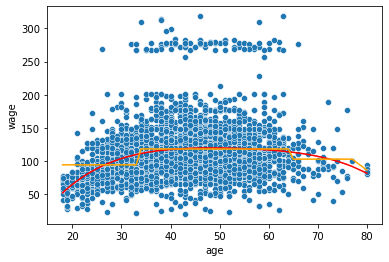

In [412]:
sns.scatterplot(x = "age", y = "wage", ci = None, data = new_data)
sns.lineplot(x = new_data['age'], y = modle.predict(X_poly), color = 'red')
step_function_data['wagehat'] = res.predict(step_function_data)
sns.lineplot(x = 'age', y = 'wagehat', data = step_function_data, color = 'Orange')

## 3)  Decision Trees (40 points)

For this problem, we will be using the Boston housing data to predict housing values (medv) based on several other attributes.  We will use the sklearn tree function for this operation.

3a)  Read in the Boston.csv file to a dataframe named boston_df.  Create X and y dataframes where y contains the medv variable and X contains everything else.

In [413]:
Boston=pd.read_csv('Boston.csv ')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [414]:
X=Boston.drop(columns=['medv'])
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [415]:
y=Boston['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

3b)  Split the data into training and test partition with train_size = 0.5 and random_state = 0.  Use the sklearn DecisionTreeRegressor function to create and print a decision tree with max_depth = 2 using the training data.

In [416]:
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.5, random_state = 0)

[Text(167.4, 181.2, 'lstat <= 7.81\nmse = 92.491\nsamples = 253\nvalue = 23.049'),
 Text(83.7, 108.72, 'rm <= 7.435\nmse = 84.345\nsamples = 86\nvalue = 32.492'),
 Text(41.85, 36.23999999999998, 'mse = 41.903\nsamples = 68\nvalue = 28.978'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 21.812\nsamples = 18\nvalue = 45.767'),
 Text(251.10000000000002, 108.72, 'lstat <= 15.0\nmse = 27.121\nsamples = 167\nvalue = 18.186'),
 Text(209.25, 36.23999999999998, 'mse = 12.255\nsamples = 87\nvalue = 21.566'),
 Text(292.95, 36.23999999999998, 'mse = 17.363\nsamples = 80\nvalue = 14.511')]

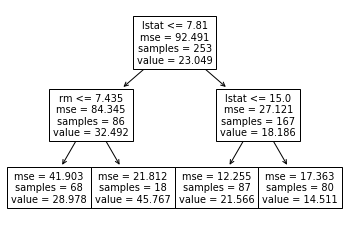

In [417]:
model_2= DecisionTreeRegressor(max_depth = 2)
tree_res= model_2.fit(X_train,y_train)
tree.plot_tree(tree_res,feature_names = X_train.columns)

3c)  By visually inspecting the tree, what would be the predicted house value for a house with lsat=7 and rm = 8?

  - 45.767

3d)  Using the test partition, calculate the mean squared prediction error

In [418]:
mean_squared_error(y_test,tree_res.predict(X_test))

28.80154486445795

3e) Now, create a similar decision tree with a maximum number of levels of 4 and calculate its mean squared prediction error

In [419]:
def decision_tree(k):
    model_3= DecisionTreeRegressor(max_depth = k)
    tree_res= model_3.fit(X_train,y_train)
    return mean_squared_error(y_test,tree_res.predict(X_test))
decision_tree(4)

23.81737151382862

3f)  Create and display a dataframe showing the Mean Square Prediction Error for tree sizes from 2 to 20

In [420]:
Mean_Square_1=[]
for i in list(range(2,21,1)):
    Mean_Square_1.append(decision_tree(i))
Mean_Square_1=pd.DataFrame(Mean_Square_1)
Mean_Square_1['Tree Size']= list(range(2,21,1))
Mean_Square_1

,0,Tree Size
0,28.801545,2
1,26.023231,3
2,23.585130,4
3,24.249861,5
4,24.247970,6
5,23.638059,7
6,23.895897,8
7,27.143469,9
8,25.270348,10
9,27.320926,11


3g)  For the tree with max_depth = 4, create a scatterplot showing the actual medv on the x-axis and the predicted medv on the y-axis

In [421]:
def predict(k):
    model_4 = DecisionTreeRegressor(max_depth = k)
    res = model_4.fit(X_train,y_train)
    predict = res.predict(X_test)
    return predict

In [422]:
medv_pre = pd.DataFrame(columns = ['medv','predicted medv'])
medv_pre['medv'] = y_test

<AxesSubplot:xlabel='medv', ylabel='Predicted medv'>

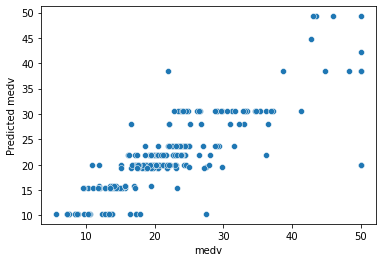

In [423]:
medv_pre['Predicted medv'] = predict(4)
sns.scatterplot(x = 'medv', y = 'Predicted medv', 
                data = medv_pre)

3h)  For the tree with max_depth = 20, create a scatterplot showing the actual medv on the x-axis and the predicted medv on the y-axis

<AxesSubplot:xlabel='medv', ylabel='Predicted medv'>

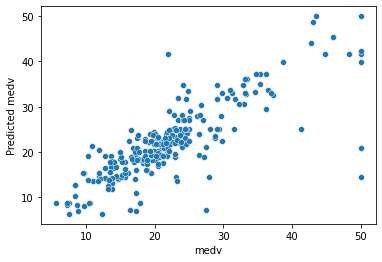

In [424]:
medv_pre['Predicted medv'] = predict(20)
sns.scatterplot(x = 'medv', y = 'Predicted medv', 
                data = medv_pre)

3i)  For the tree with max_depth=20, what feature is the most significant in influencing the prediction?

In [425]:
model_5 = DecisionTreeRegressor(max_depth = 20)
model_5.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20)

In [426]:
final_data = pd.DataFrame(columns = ['Significant','Feature'])
final_data['Significant'] = model_5.feature_importances_
final_data['Feature'] = Boston.columns[:-1]
final_data

,Significant,Feature
0,0.014224,crim
1,0.001544,zn
2,0.006130,indus
3,0.000005,chas
4,0.002450,nox
5,0.232211,rm
6,0.015712,age
7,0.087144,dis
8,0.006429,rad
9,0.017702,tax


In [427]:
a=model_5.feature_importances_.max()
a

0.592912187941423

In [428]:
final_data['Significant']==a

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
Name: Significant, dtype: bool

  - lstat